# Titanic: Machine Learning from Disaster

## 1. Problem Statement
The goal of the titanic competition is to use machine learning algorithms to create a model that could predict which passengers survived the Titanic shipwreck. Basically, the task is a binary classification problem where given a set of data on passengers on aboard, such as sex, age, and class and the goal of the model is to predict whether a given passenger would have survived in this disaster or not. 

## 2. Data Exploration
### 2.1 Load the dataset
Using Pandas dataframe to read the train and test csv files, and peek at the first 10 rows of the training data using ```head()``` command. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

train = pd.read_csv('/Users/wangxindi/Downloads/titanic/train.csv')
test = pd.read_csv('/Users/wangxindi/Downloads/titanic/test.csv')
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2.2 Explore the Dataset
In this section, we explore and analysis the dataset using plots in order to have some insights of the data. 
#### 2.2.1 Distrubution of the Dataset
Here, first we use the ```info()``` function to get some basic information of both training set and test set. Then we plot the distribution of all feature values. 
##### 2.2.1.1 Training Set
The training set contains 891 rows and 12 columns. Possible features for each data point are passenger ID (PassengerId), ticket class (pclass), name, sex, age, number of siblings / spouses aboard (SibSp), number of parents / children aboard (Parch), ticket number (ticket), cabin, port of embarkation (Embarked， C = Cherbourg, Q = Queenstown, S = Southampton). Labels are which passengers survived the Titanic tragedy (Survived, 0 = No, 1 = Yes).

In [22]:
print('The shape of the train dataset is {}'.format(train.shape))
# information of the training set
train.info()

The shape of the train dataset is (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


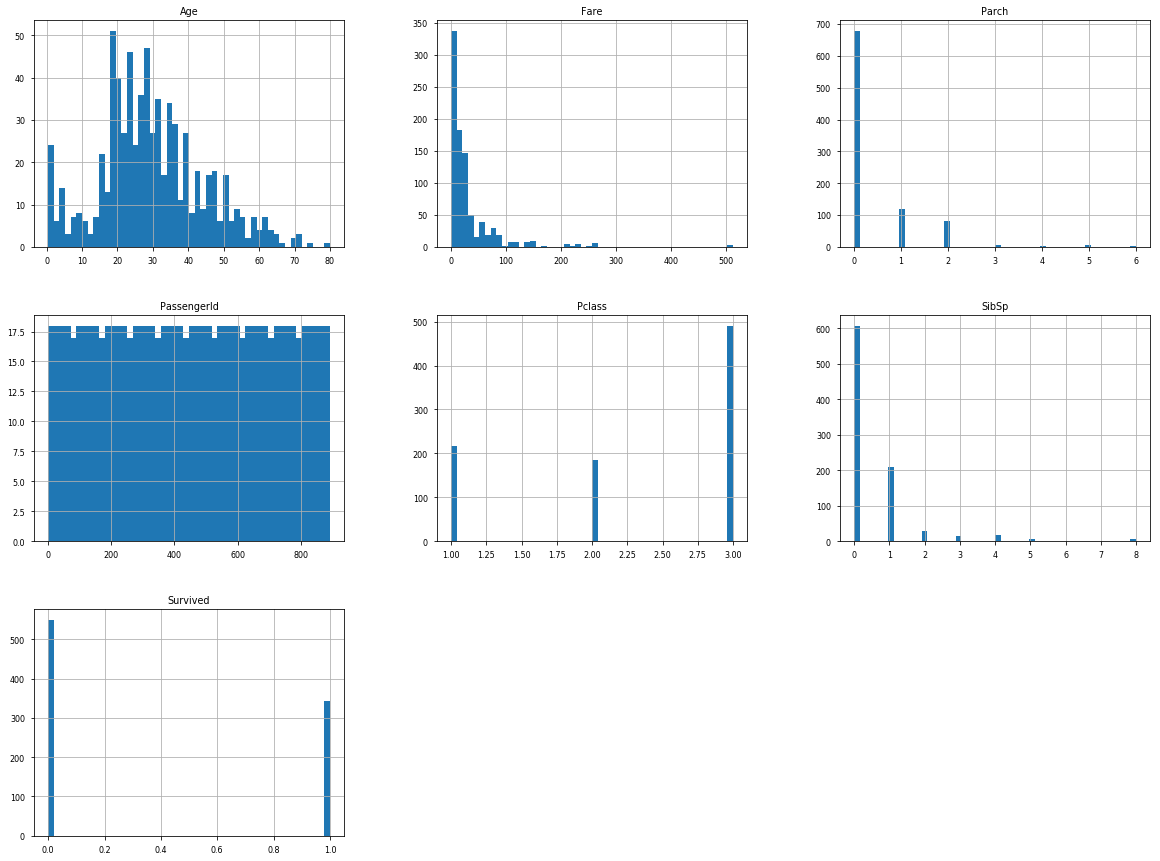

In [23]:
%matplotlib inline
train.hist(bins=50, figsize=(20,15))
plt.show()

#### 2.2.2.2 Test Set
The test set contains 418 rows and 11 columns. Possible features for each data point are passengers’ ID (PassengerId), ticket class (pclass), name, sex, age, number of siblings / spouses aboard (SibSp), number of parents / children aboard (Parch), ticket number (ticket), cabin, port of embarkation (Embarked， C = Cherbourg, Q = Queenstown, S = Southampton). Label that need to be predicted is which passengers survived the Titanic tragedy (Survived, 0 = No, 1 = Yes).

In [24]:
print('The shape of the test dataset is {}'.format(test.shape))
test.info()

The shape of the test dataset is (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


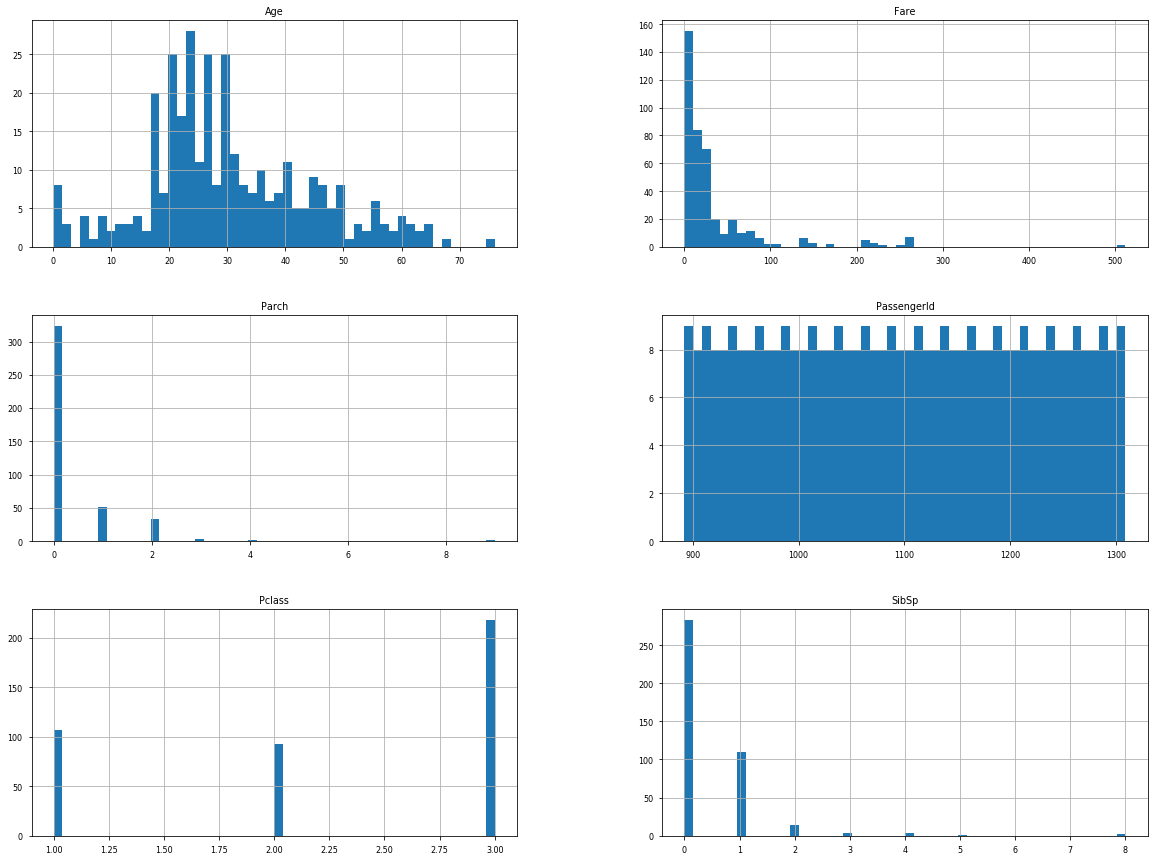

In [25]:
test.hist(bins=50, figsize=(20,15))
plt.show()

### 2.2.2 Observations
From the above information, we noticed that 
1. Features are in different types:
    (1). Categorical features: Sex, Embarked, Parch, Pclass and SibSp 
    (2). Continuous features: Age and Fare
2. Some of the features are missing, 
    (1). Training set: Age, Cabin and Embarked
    (2). Test set: Age, Fare, Cabin and Embarked


#### 2.2.2.1 Missing Data

In [26]:
def get_miss_data_table(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.set_context('paper')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Missing data by feature', fontsize=15)
    return missing_data

##### 2.2.2.1.1 Training Set

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


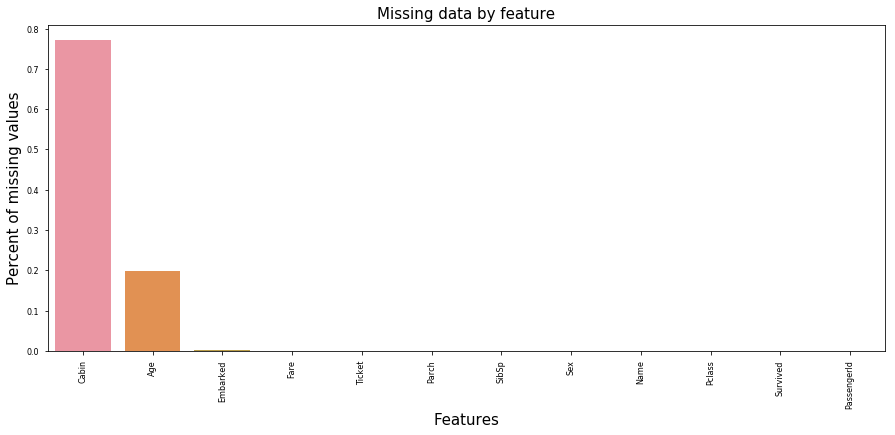

In [27]:
get_miss_data_table(train)

##### 2.2.2.1.2 Test Set

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


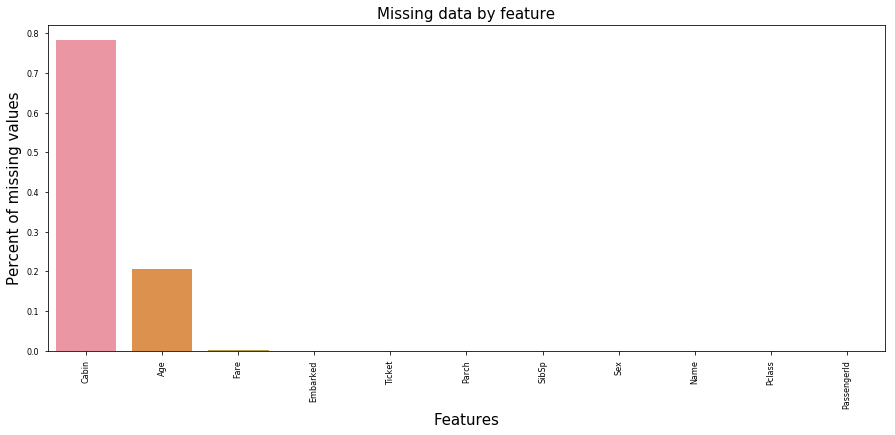

In [28]:
get_miss_data_table(test)

#### 2.2.2.2 Correlation between Categorical Features and Survivial Rate
Using bar chart to show the correlation between survival and categorical features, such as Pclass, Sex, SibSp ( # of siblings and spouse), Parch ( # of parents and children), and Embarked. 

##### Pclass
The bar chart below shows that passengers in 1st class more likely survived than other classes, and passengers in the 3rd class more likely dead than other classes.

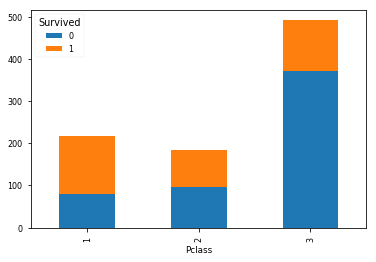

In [29]:
train.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

##### Sex
The bar chart shows that female passengers more likely survived than male.

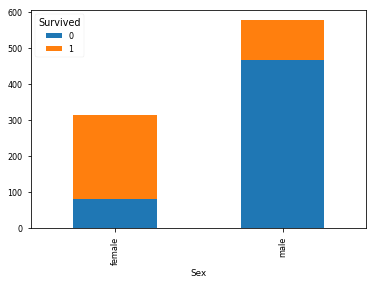

In [30]:
train.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)

##### Number of Siblings / Spouses aboard (SibSp)
The bar charts shows that a passenger boarded with more than 2 siblings or spouse more likely survived, and without siblings or spouse more likely dead.

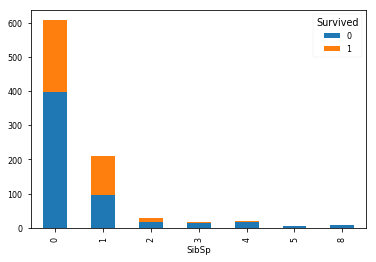

In [31]:
train.pivot_table('PassengerId', 'SibSp', 'Survived', 'count').plot(kind='bar', stacked=True)

##### Number of Parents / Children aboard (Parch)
The bar chart shows that a passenger boarded with more than 2 parents or children more likely survived, and passengers boarded alone more likely dead.

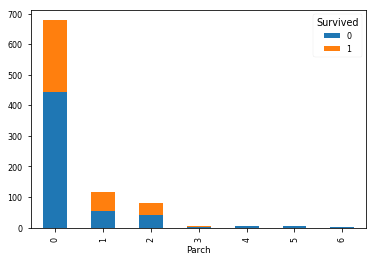

In [32]:
train.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(kind='bar', stacked=True)

##### Port of Embarkation (Embarked)
The bar chart confirms a passenger boarded from C slightly more likely survived.

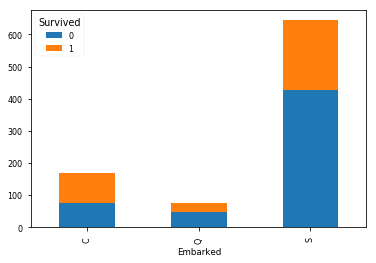

In [33]:
train.pivot_table('PassengerId', 'Embarked', 'Survived', 'count').plot(kind='bar', stacked=True)

From above bar charts, we observed that: 
1. Pclass, Sex, and Embarked are significant factors
2. SibSp, Parch, and Cabin are not significant factors

#### 2.2.2.2 Correlation between Numerical Features and Survivial Rate
Using box plots to show the correlation between survival and numerical features, such as Age and Fare. 

##### Age
The box plot shows that survived passengers are slightly younger than those who are dead. 

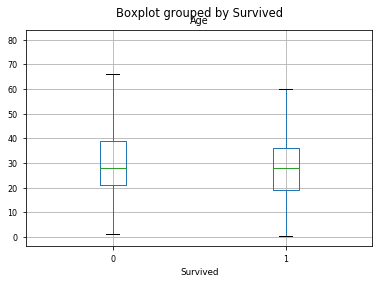

In [34]:
train.boxplot(by='Survived', column='Age')

##### Fare
The box plots show that the fares of survived passengers have higher value than that of dead ones. 

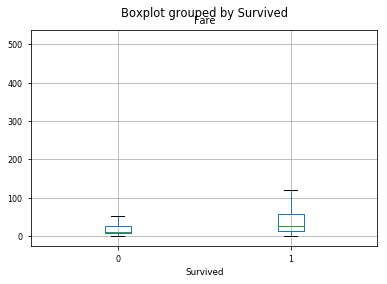

In [35]:
train.boxplot(by='Survived', column='Fare')

## 3. Feature Engineering 
### 3.1 Name 
As passengers' names are quite various, which are not significant to predictions; however, from the analysis of the dataset above, we have found that 'Sex' has important correlation with the survival rate. Hence, we keep the title extracted from the 'Name' column and create a new column called 'Title' to save them. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

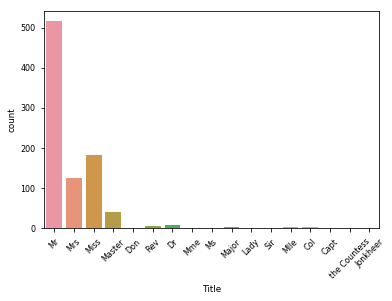

In [36]:
train['Title']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# show the distribution of different titiles
sns.countplot(x='Title', data=train)
plt.xticks(rotation=45)

We have seen that Mr, Mrs, Miss and Master are the most common titles, others only have a very low frequency. So we group titles into five categories: Mr, Mrs, Miss, Master and Rare. From the plot below, we could see that 'Mr' who mainly characterize men has a low survival rate while 'Mrs' & 'Miss' who mainly characterize women has a high survival rate. At last, we encode title categories into numerical encodings. 

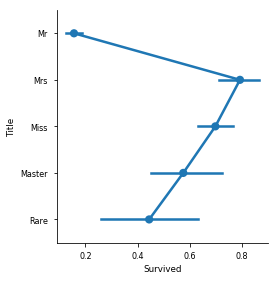

In [37]:
titles = ['Miss','Master','Mr','Mrs']
train['Title'] = train['Title'].apply(lambda x: 'Rare' if x not in titles else x) 
sns.factorplot('Survived','Title',data=train)

# mapping title categories to numerical encoding
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
train['Title_Encode'] = train['Title'].map(title_mapping)

In [38]:
test['Title']=test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Title'].apply(lambda x: 'Rare' if x not in titles else x) 
test['Title_Encode'] = test['Title'].map(title_mapping)

### 3.2 Sex
We encode 'Sex' into numerical features (Male:0, Female:1).

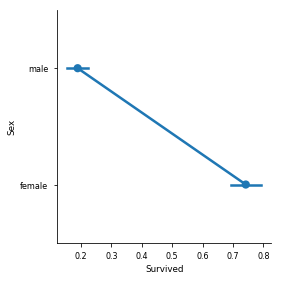

In [39]:
sex_mapping = {'male':0, 'female': 1}
train['Sex_Encode'] = train['Sex'].map(sex_mapping)
sns.factorplot('Survived','Sex',data=train)

test['Sex_Encode'] = test['Sex'].map(sex_mapping)

### 3.3 Age
We first deal with the missing data point by using the SEX's median age to fill out the missing age, and then converting numerical age to categorical attributes
Age map:
child: <=16, 0
young adult: 17-30, 1
middle-age adult: 31-45, 2
old-adult: >45, 3

In [40]:
# fill out the missing age using median age within sex
train['Age_Encode'] = train['Age']
test['Age_Encode'] = test['Age']
train['Age_Encode'].fillna(train.groupby('Sex')['Age_Encode'].transform('median'), inplace=True)
test['Age_Encode'].fillna(test.groupby('Sex')['Age_Encode'].transform('median'), inplace=True)

# set a age bands
age_cut = pd.cut(train.Age_Encode, 5)
age_cut.value_counts().sort_index()

(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_Encode, dtype: int64

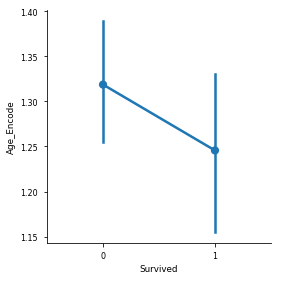

In [41]:
#converting numerical age to categorical variable
def age_to_categorical(dataset):
    dataset.loc[ dataset['Age_Encode'] <= 16, 'Age_Encode'] = 0
    dataset.loc[(dataset['Age_Encode'] > 16) & (dataset['Age_Encode'] <= 32), 'Age_Encode'] = 1
    dataset.loc[(dataset['Age_Encode'] > 32) & (dataset['Age_Encode'] <= 48), 'Age_Encode'] = 2
    dataset.loc[(dataset['Age_Encode'] > 48) & (dataset['Age_Encode'] <= 64), 'Age_Encode'] = 3
    dataset.loc[ dataset['Age_Encode'] > 64, 'Age_Encode'] = 4

# converting training set
age_to_categorical(train)
sns.factorplot('Survived','Age_Encode',data=train)

In [42]:
# converting test set
age_to_categorical(test)

### 3.4 Fare
We first deal with the missing data point by using the median to fill out the missing fare, then converting numerical fare to categorical attributes.

In [43]:
train['Fare_Encode'] = train['Fare']
test['Fare_Encode'] = test['Fare']
# fill missing Fare with median fare for each Pclass
train['Fare_Encode'].fillna(train.groupby('Pclass')['Fare_Encode'].transform('median'), inplace=True)
test['Fare_Encode'].fillna(test.groupby('Pclass')['Fare_Encode'].transform('median'), inplace=True)

# set a fare band
fare_cut = pd.qcut(train.Fare,5)
fare_cut.value_counts().sort_index()

(-0.001, 7.854]      179
(7.854, 10.5]        184
(10.5, 21.679]       172
(21.679, 39.688]     180
(39.688, 512.329]    176
Name: Fare, dtype: int64

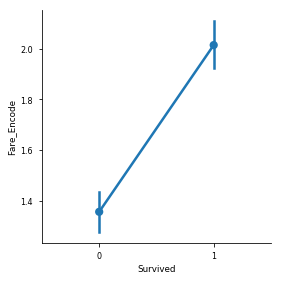

In [44]:
#converting numerical age to categorical variable
def fare_to_categorical(dataset):
    dataset.loc[ dataset['Fare'] <= 7.8, 'Fare_Encode'] = 0
    dataset.loc[(dataset['Fare'] > 7.8) & (dataset['Fare'] <= 10.5), 'Fare_Encode'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 39.7), 'Fare_Encode'] = 2
    dataset.loc[(dataset['Fare'] > 39.7) & (dataset['Fare'] <= 512.3), 'Fare_Encode'] = 3
    dataset.loc[ dataset['Fare'] > 512.3, 'Fare_Encode'] = 4
    
fare_to_categorical(train)
sns.factorplot('Survived','Fare_Encode', data=train)

In [45]:
fare_to_categorical(test)

### 3.5 Cabin 
There are too many missing values in cabin column, we assume that the survival rate might be different for people who has cabin number and people who has not. 

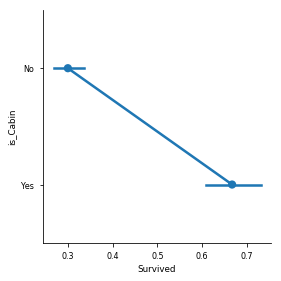

In [46]:
train['Cabin_Encode'] = train['Cabin']
test['Cabin_Encode'] = test['Cabin']

train['is_Cabin'] = train['Cabin']
test['is_Cabin'] = test['Cabin']
                          
def is_cabin_to_categorical(dataset):
    dataset.loc[dataset.Cabin.notnull(),'is_Cabin']= 'Yes'
    dataset.loc[dataset.Cabin.isnull(),'is_Cabin']= 'No'
    
def cabin_to_categorical(dataset):
    dataset.loc[dataset.Cabin.notnull(),'Cabin_Encode']= 0
    dataset.loc[dataset.Cabin.isnull(),'Cabin_Encode']= 1

is_cabin_to_categorical(train) 
cabin_to_categorical(train)
sns.factorplot('Survived','is_Cabin', data=train)

In [47]:
is_cabin_to_categorical(test)
cabin_to_categorical(test) 

### 3.5 Embarked 
From the analysis above, we notice that there is only one missing value in Embarked column, and we fill the missing 'Embarked' with the mode. Then we encode 'Embarked' into numerical features S:0, C:1, Q:2).

In [48]:
train.Embarked.mode()

0    S
dtype: object

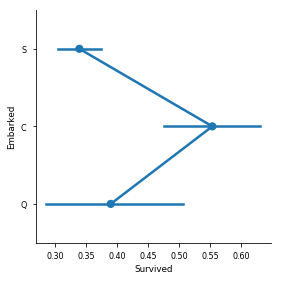

In [49]:
train['Embarked'].fillna('S',inplace=True)

# mapping title categories to numerical encoding
embarked_mapping = {'S': 0, 'C': 1, 'Q':2}
train['Embarked_Encode'] = train['Embarked'].map(embarked_mapping)

sns.factorplot('Survived','Embarked', data=train)

test['Embarked_Encode'] = test['Embarked'].map(embarked_mapping)

### 3.5 Family On Board
The 'SibsSP' feature refers to the number of siblings or spouses that a passenger had aboard, and the 'Parch' refers to the number of parents or children someone had on the ship. These two features could be combine as a new feature 'Family_Together', where we want to know if a passenger had someone from his/her family onboard. 

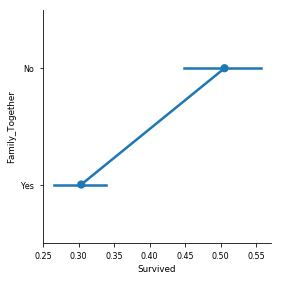

In [50]:
train['Family_Size'] = train['SibSp'] + train['Parch']
test['Family_Size'] = test['SibSp'] + test['Parch']

train['Family_Together'] = train.apply(lambda x: 'No' if x.Family_Size > 0 else 'Yes',axis=1)
sns.factorplot('Survived','Family_Together', data=train)

def famliy_to_categorical(dataset):
    dataset.loc[ dataset['Family_Together']=='No', 'Family_Together'] = 0
    dataset.loc[ dataset['Family_Together']=='Yes', 'Family_Together'] = 1

famliy_to_categorical(train)

In [51]:
test['Family_Together'] = test.apply(lambda x: 'No' if x.Family_Size > 0 else 'Yes',axis=1)
famliy_to_categorical(test)

In [52]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Title_Encode,Sex_Encode,Age_Encode,Fare_Encode,Cabin_Encode,is_Cabin,Embarked_Encode,Family_Size,Family_Together
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,0,0,1.0,0.0,1,No,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,2,1,2.0,3.0,0,Yes,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,1,1,1.0,1.0,1,No,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,2,1,2.0,3.0,0,Yes,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,0,0,2.0,1.0,1,No,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Mr,0,0,1.0,1.0,1,No,2,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,Mr,0,0,3.0,3.0,0,Yes,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,Master,3,0,0.0,2.0,1,No,0,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,Mrs,2,1,1.0,2.0,1,No,0,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,Mrs,2,1,0.0,2.0,1,No,1,1,0


In [53]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Encode,Sex_Encode,Age_Encode,Fare_Encode,Cabin_Encode,Embarked_Encode,Family_Size,Family_Together
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.008881,-0.042939,0.023043,-0.016296,-0.019919,-0.030467,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.414088,0.543351,-0.043800,0.317485,-0.316912,0.106811,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.184841,-0.131900,-0.358769,-0.651486,0.725541,0.045702,0.065997,0.135207
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.106788,-0.093254,0.946266,0.101680,-0.249732,0.010171,-0.301914,0.198270
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.258403,0.114631,-0.218747,0.330585,0.040460,-0.059961,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.303608,0.245489,-0.135227,0.319199,-0.036987,-0.078665,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.137318,0.182333,0.123640,0.603361,-0.482075,0.062142,0.217138,-0.271832
Title_Encode,0.008881,0.414088,-0.184841,-0.106788,0.258403,0.303608,0.137318,1.000000,0.508099,-0.052375,0.327190,-0.144521,0.051211,0.328287,-0.387780
Sex_Encode,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.508099,1.000000,-0.070220,0.255712,-0.140391,0.116569,0.200988,-0.303646
Age_Encode,0.023043,-0.043800,-0.358769,0.946266,-0.218747,-0.135227,0.123640,-0.052375,-0.070220,1.000000,0.118198,-0.262134,-0.051334,-0.217063,0.123981


### 4. Basic Modeling

In [54]:
predictors=['Pclass','Title_Encode','Sex_Encode','Age_Encode','Fare_Encode','Cabin_Encode','Embarked_Encode','Family_Together']

In [55]:
from sklearn.model_selection import StratifiedKFold
# get cleaned training set and test set
x_train = pd.get_dummies(train[predictors])
x_test = pd.get_dummies(test[predictors])
y_train = train.Survived

#Since some models are sensitive to the scaling of the data, here we also apply standard-scaling to the data
scaler=StandardScaler()
x_train_scaled = scaler.fit(x_train).transform(x_train)
x_test_scaled = scaler.fit(x_train).transform(x_test)

# cross validation (K-fold)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)

#### 4.1  Gaussian Naive Bayes

In [56]:
clf = GaussianNB()
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score = round(np.mean(score)*100, 2)
print('training accuracy', score)

score_scaled = cross_val_score(clf, x_train_scaled, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score_scaled = round(np.mean(score_scaled)*100, 2)
print('scaled training accuracy', score_scaled)

training accuracy 75.66
scaled training accuracy 75.66


#### 4.2 Perceptron

In [57]:
param_grid = {'hidden_layer_sizes':[(8,), (32,)], 'solver':['sgd', 'adam'], 'learning_rate_init':[1e-3, 1e-5]}
clf = MLPClassifier(max_iter=10000)
grid_search=GridSearchCV(clf,param_grid,cv=k_fold)
grid_search.fit(x_train, y_train)
print('training accuracy', grid_search.best_params_,grid_search.best_score_)

/Users/wangxindi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/wangxindi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/wangxindi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/wangxindi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimizati

training accuracy {'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001, 'solver': 'adam'} 0.7777777777777778


In [58]:
clf = MLPClassifier(hidden_layer_sizes=(32,), max_iter=10000, learning_rate_init=0.001)
score = round(np.mean(score)*100, 2)
print('training accuracy', score)

score_scaled = cross_val_score(clf, x_train_scaled, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score_scaled = round(np.mean(score_scaled)*100, 2)
print('scaled training accuracy', score_scaled)

training accuracy 7566.0
scaled training accuracy 79.58


#### 4.3 Decision Tree

In [59]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score = round(np.mean(score)*100, 2)
print('training accuracy', score)

score_scaled = cross_val_score(clf, x_train_scaled, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score_scaled = round(np.mean(score_scaled)*100, 2)
print('scaled training accuracy',score_scaled)

training accuracy 80.59
scaled training accuracy 80.7


#### 4.3 Support Vecotr Machine (SVM)

In [65]:
clf = SVC()
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score = round(np.mean(score)*100, 2)
print('training accuracy', score)

score_scaled = cross_val_score(clf, x_train_scaled, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score_scaled = round(np.mean(score_scaled)*100, 2)
print('scaled training accuracy', score_scaled)

training accuracy 81.49
scaled training accuracy 81.82


#### 4.4 k-Nearest Neighbors

In [66]:
param_grid = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=k_fold)
grid_search.fit(x_train, y_train)
print('training accuracy', grid_search.best_params_,grid_search.best_score_)

training accuracy {'n_neighbors': 10} 0.813692480359147


In [67]:
# scaled
grid_search.fit(x_train_scaled, y_train)
print('scaled training accuracy', grid_search.best_params_,grid_search.best_score_)

scaled training accuracy {'n_neighbors': 6} 0.8204264870931538


### 5. Testing
Since many algorithms performs better in scaled data, we use scaled data in testing. According to the results in training set, we select k-nearest neighbors as our model. 

In [68]:
cls = KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train_scaled, y_train)
prediction = clf.predict(x_test_scaled)

# save to file
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)